# 02.03.2021

Oppgave: les inn datasettet pressure1.dat og finn gradienten i y = 50

In [1]:
import matplotlib.pyplot as plt
import numpy as np

utgangspunkt: 

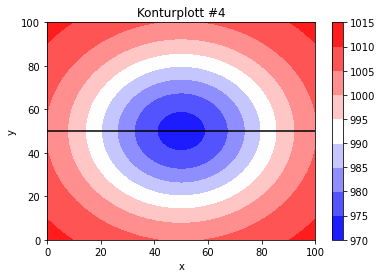

In [2]:
#read data
x, y, z = np.genfromtxt(r'pressure1.dat', unpack=True)

#set colour map
plt.set_cmap('bwr')

#make plot and add colourbar
plt.tricontourf(x, y, z)
plt.colorbar()

plt.hlines(y = 50,xmin=0,xmax=100,color='k')

#add some text
plt.title('Konturplott #4')
plt.xlabel('x')
plt.ylabel('y')

#make a plot 
plt.savefig('kontur4.jpg', dpi=240)

Vi skal finne gradienten i y = 50. Fra forrige gang husker vi at `np.gradient` regner ut gradienten. Så vi finner alle Z-verdiene i y = 50 og regner det ut. 

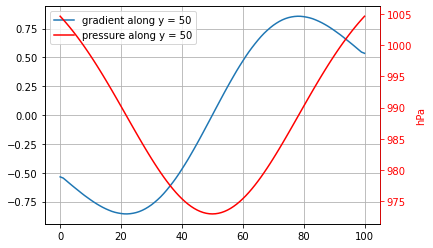

In [3]:
# dy: spacing in y-direction
dy = np.diff(y)[0]

# find where y = 50
y_50 = np.where(y==50)
# select all the z-values where y = 50
z_50 = z[y_50]
# calculate the gradient in z where y = 50
z_50_grad = np.gradient(z_50.squeeze(),dy)

#plot the result
fig,ax = plt.subplots()
ax.plot(z_50_grad,label='gradient along y = 50')
axb = ax.twinx()
#see how it corresponds to the pressure field in the same location
axb.plot(z_50,label='pressure along y = 50',color='r')
#add text
axb.set_ylabel('hPa',color='r')
#want the colors to match the line so we know which
# axes correspond to the differnet variables
axb.spines['right'].set_color('red')
axb.yaxis.label.set_color('red')
axb.tick_params(axis='y', colors='red')

# since we've plotted the pressure on a different axes, 
# we have to make a label on the regular axes as well 
# so we can make a legend
ax.plot(np.nan,np.nan,label='pressure along y = 50',color='r')

ax.legend()

ax.grid(True)

Vi har også lyst til å regne ut hvordan gradienten ser ut i alle punkter, har vi ikke? 

In [4]:
# if we want to calculate the gradient everywhere, 
# it is easier if we reshape our variables 
# onto a grid instead of having them as 1-D. 
Z_ = np.reshape(z,(101,-1))
X_ = np.reshape(x,(101,-1))
Y_ = np.reshape(y,(101,-1))

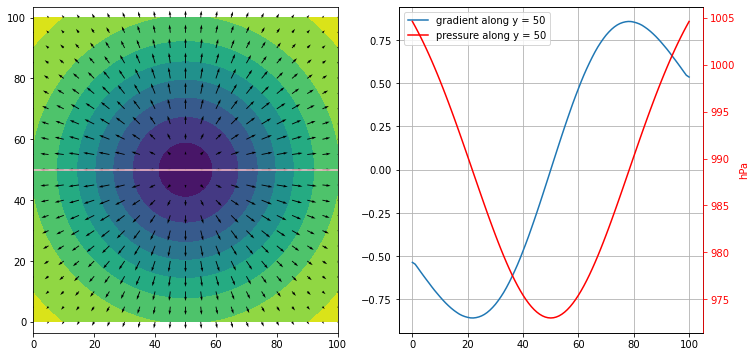

In [5]:
#then we can calculate dzdx and dzdy from Z_. 
dzdx,dzdy = np.gradient(Z_)

fig,axs = plt.subplots(figsize=(12,6),ncols=2)


ax = axs[0]
# we can also use the regular contourf instead of the 
# tricontourf
ax.contourf(X_,Y_,Z_,cmap='viridis')
# we don't want to plot all the arrows
step=5
#quiver plot for plotting every step'th arrow (here 5th)
ax.quiver(X_[::step,::step],Y_[::step,::step],
          dzdx[::step,::step],dzdy[::step,::step])
# we want the y axis and x-axis to be of equal width/hegiht
ax.axis('equal')
# plot where we find the gradient in the task above as a line
ax.hlines(y=50,xmin=0,xmax=100,color='pink')

#plot it next to the pressure field so we can see it together.
ax = axs[1]
ax.plot(z_50_grad,label='gradient along y = 50')
axb = ax.twinx()
axb.plot(z_50,label='pressure along y = 50',color='r')
axb.set_ylabel('hPa',color='r')
axb.spines['right'].set_color('red')
axb.yaxis.label.set_color('red')
axb.tick_params(axis='y', colors='red')

ax.plot(np.nan,np.nan,label='pressure along y = 50',color='r')

ax.legend()

ax.grid(True)
